In [13]:
import sys

sys.path.insert(0, "..")

In [14]:
from transtycoon.entities import Field, Warehouse, Position, Transporter
from transtycoon.simulation import OneWayGathering, Simulation
from transtycoon.report import plot_objects

%matplotlib inline

In [15]:
log = True

field1 = Field(Position(10, -10), 70, name="Field1")
field2 = Field(Position(-5, 20), 70, name="Field2")
inter_warehouse = Warehouse(Position(-5, 10))
final_warehouse = Warehouse(Position(-20, 0))
transporter1 = Transporter(Position(10, 10), speed=1, max_capacity=30, name="Field truck 1", log=log)
transporter2 = Transporter(Position(-5, 5), speed=1, max_capacity=30, name="Field truck 2", log=log)
transporter3 = Transporter(Position(5, -5), speed=1, max_capacity=50, name="Warehouse truck 1", log=log)

In [16]:
field1_to_warehouse_task = OneWayGathering(gather_from=field1, deliver_to=inter_warehouse)
field2_to_warehouse_task = OneWayGathering(gather_from=field2, deliver_to=inter_warehouse)
warehouse_to_warehouse = OneWayGathering(gather_from=inter_warehouse,
                                         deliver_to=final_warehouse,
                                         wait_for=[transporter1, transporter2],
                                        min_amount=40)

transporter1.assign_task_queue([field1_to_warehouse_task, field2_to_warehouse_task])
transporter2.assign_task_queue([field2_to_warehouse_task, field1_to_warehouse_task])
transporter3.assign_task_queue([warehouse_to_warehouse])

In [17]:
animate_objects = {"warehouses": [inter_warehouse, final_warehouse],
                   "transports": [transporter1, transporter2, transporter3],
                   "fields": [field1, field2]
                  }
simulation = Simulation(transports=[transporter1, transporter2, transporter3], captured_objects=animate_objects)

[Time 2, Field truck 1] Moving to the Field1 (70) : position=[10.0, 10.0]  carry=0
[Time 2, Field truck 2] Moving to the Field2 (70) : position=[-5.0, -5.0]  carry=0
[Time 2, Warehouse truck 1] Moving to the Warehouse (0) : position=[3.9, 3.9]  carry=0


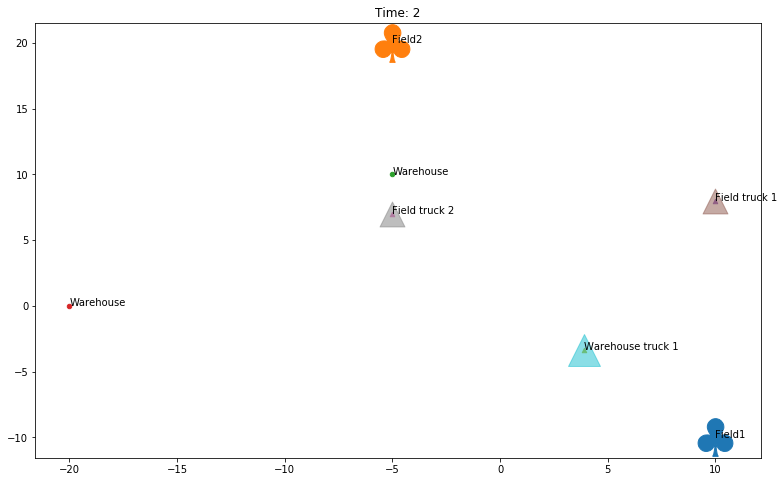

In [19]:
# Make one turn (cell can be executed multiple times), or in the loop (see cell below)
simulation.make_turn()
simulation.make_snapshot()[1]

In [7]:
simulation.make_animation = False
simulation.make_turns()

[Time 1, Field truck 1] Moving to the Field1 (70) : position=[0.7, 0.7]  carry=0
[Time 1, Field truck 2] Moving to the Field2 (70) : position=[-0.2, -0.2]  carry=0
[Time 1, Warehouse truck 1] Moving to the Warehouse (0) : position=[-0.4, -0.4]  carry=0
[Time 2, Field truck 1] Moving to the Field1 (70) : position=[1.4, 1.4]  carry=0
[Time 2, Field truck 2] Moving to the Field2 (70) : position=[-0.5, -0.5]  carry=0
[Time 2, Warehouse truck 1] Moving to the Warehouse (0) : position=[-0.9, -0.9]  carry=0
[Time 3, Field truck 1] Moving to the Field1 (70) : position=[2.1, 2.1]  carry=0
[Time 3, Field truck 2] Moving to the Field2 (70) : position=[-0.7, -0.7]  carry=0
[Time 3, Warehouse truck 1] Moving to the Warehouse (0) : position=[-1.3, -1.3]  carry=0
[Time 4, Field truck 1] Moving to the Field1 (70) : position=[2.8, 2.8]  carry=0
[Time 4, Field truck 2] Moving to the Field2 (70) : position=[-1.0, -1.0]  carry=0
[Time 4, Warehouse truck 1] Moving to the Warehouse (0) : position=[-1.8, -1.

[Time 30, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=0  min_carg0=40
[Time 31, Field truck 1] Moving to the Warehouse (0) : position=[1.0, 1.0]  carry=30
[Time 31, Field truck 2] Moving to the Warehouse (0) : position=[-5.0, -5.0]  carry=30
[Time 31, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=0  min_carg0=40
[Time 32, Field truck 1] Moving to the Warehouse (0) : position=[0.4, 0.4]  carry=30
[Time 32, Field truck 2] Moving to the Warehouse (0) : position=[-5.0, -5.0]  carry=30
[Time 32, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=0  min_carg0=40
[Time 33, Field truck 1] Moving to the Warehouse (0) : position=[-0.2, -0.2]  carry=30
[Time 33, Field truck 2] Unloading the cargo : position=[-5.0, -5.0]  carry=0
[Time 33, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  p

[Time 60, Field truck 2] Moving to the Field2 (10) : position=[-5.0, -5.0]  carry=0
[Time 60, Warehouse truck 1] Moving to the Warehouse (0) : position=[-20.0, -20.0]  carry=50
[Time 61, Field truck 1] Moving to the Field1 (40) : position=[6.4, 6.4]  carry=0
[Time 61, Field truck 2] Moving to the Field2 (10) : position=[-5.0, -5.0]  carry=0
[Time 61, Warehouse truck 1] Moving to the Warehouse (0) : position=[-20.0, -20.0]  carry=50
[Time 62, Field truck 1] Moving to the Field1 (40) : position=[7.0, 7.0]  carry=0
[Time 62, Field truck 2] Moving to the Field2 (10) : position=[-5.0, -5.0]  carry=0
[Time 62, Warehouse truck 1] Unloading the cargo : position=[-20.0, -20.0]  carry=0
[Time 63, Field truck 1] Moving to the Field1 (40) : position=[7.6, 7.6]  carry=0
[Time 63, Field truck 2] Moving to the Field2 (10) : position=[-5.0, -5.0]  carry=0
[Time 63, Warehouse truck 1] Moving to the Warehouse (40) : position=[-19.2, -19.2]  carry=0
[Time 64, Field truck 1] Moving to the Field1 (40) : po

[Time 91, Field truck 2] Moving to the Field1 (10) : position=[3.4, 3.4]  carry=0
[Time 91, Warehouse truck 1] Moving to the Warehouse (50) : position=[-12.5, -12.5]  carry=50
[Time 92, Field truck 1] Moving to the Warehouse (0) : position=[-4.4, -4.4]  carry=30
[Time 92, Field truck 2] Moving to the Field1 (10) : position=[4.0, 4.0]  carry=0
[Time 92, Warehouse truck 1] Moving to the Warehouse (50) : position=[-13.3, -13.3]  carry=50
[Time 93, Field truck 1] Moving to the Warehouse (0) : position=[-5.0, -5.0]  carry=30
[Time 93, Field truck 2] Moving to the Field1 (10) : position=[4.6, 4.6]  carry=0
[Time 93, Warehouse truck 1] Moving to the Warehouse (50) : position=[-14.2, -14.2]  carry=50
[Time 94, Field truck 1] Unloading the cargo : position=[-5.0, -5.0]  carry=0
[Time 94, Field truck 2] Moving to the Field1 (10) : position=[5.2, 5.2]  carry=0
[Time 94, Warehouse truck 1] Moving to the Warehouse (50) : position=[-15.0, -15.0]  carry=50
[Time 95, Field truck 1] Moving to the Field

[Time 122, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=30  min_carg0=40
[Time 123, Field truck 2] Moving to the Warehouse (30) : position=[-2.0, -2.0]  carry=10
[Time 123, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=30  min_carg0=40
[Time 124, Field truck 2] Moving to the Warehouse (30) : position=[-2.6, -2.6]  carry=10
[Time 124, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=30  min_carg0=40
[Time 125, Field truck 2] Moving to the Warehouse (30) : position=[-3.2, -3.2]  carry=10
[Time 125, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=30  min_carg0=40
[Time 126, Field truck 2] Moving to the Warehouse (30) : position=[-3.8, -3.8]  carry=10
[Time 126, Warehouse truck 1] Waiting for more resources to gather : position=[-5.0, -5.0]  carry=0  present_cargo=3

{'simulation_steps': 149,
 'total_work_steps': 395,
 'transport_steps': [119, 128, 148]}

In [8]:
# Number of time steps for transport1, transport2, transport3
simulation.completed

[119, 128, 148]

In [9]:
# Resources for particular places
field1.resources, field2.resources, final_warehouse.resources, inter_warehouse.resources

(0, 0, 140, 0)

In [10]:
# Tasks status
field1_to_warehouse_task.completed, field2_to_warehouse_task.completed, warehouse_to_warehouse.completed

(True, True, True)

In [11]:
# Remaining cargo in the transports
transporter1.loaded, transporter2.loaded, transporter3.loaded

(0, 0, 0)

In [12]:
# Total simulation time
simulation.time

149